# Outliers Detection and handling

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
df=pd.read_csv('C:\\Users\\GPT BANTWAL\\Downloads\\titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Scatter plot to detect outliers

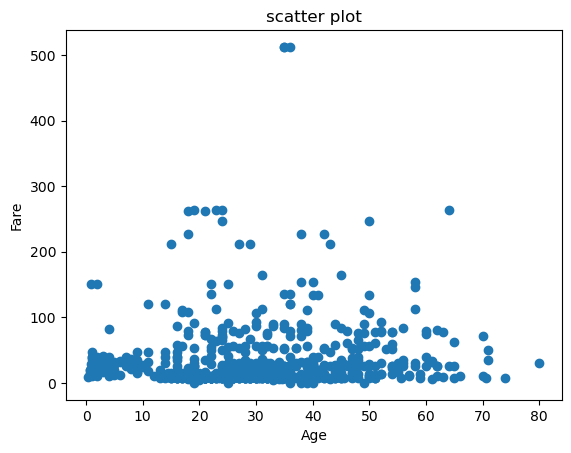

In [4]:
plt.scatter(df['age'],df['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('scatter plot')
plt.show()

# Box plot to detect outliers

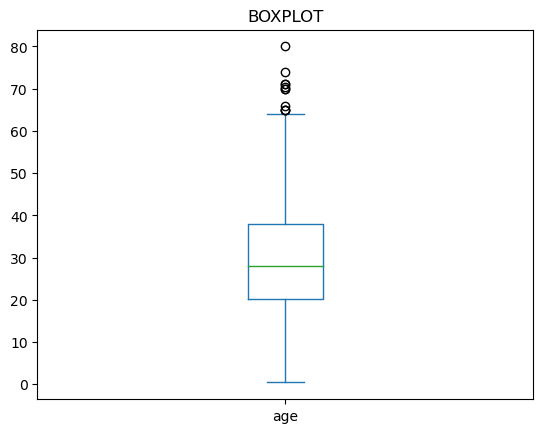

In [11]:
df['age'].plot(kind='box')
plt.title('BOXPLOT')
plt.show()

In [16]:
q1=df['age'].quantile(0.25)
print(q1)
q3=df['age'].quantile(0.75)
print(q3)
iqr=q3-q1
print(iqr)
upper_bound=q3+(1.5*iqr)
print(upper_bound)
lower_bound=q1+(1.5*iqr)
print(lower_bound)


20.125
38.0
17.875
64.8125
46.9375


In [18]:
age_arr=df['age']
outliers=age_arr[(age_arr<=lower_bound)|(age_arr>=upper_bound)]
print('The following are the outlires in the boxplot of age:\n',outliers)

The following are the outlires in the boxplot of age:
 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 627, dtype: float64


# Histogram plot to detect outliers

<Axes: ylabel='Frequency'>

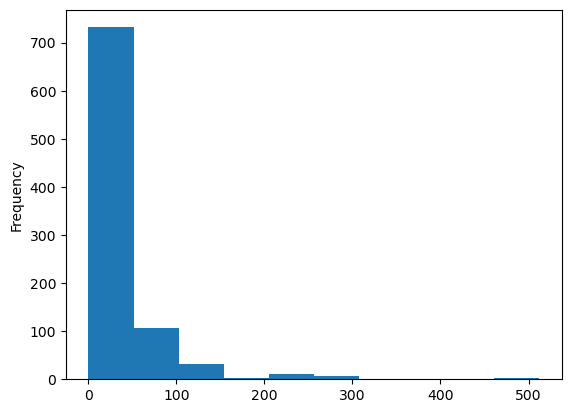

In [19]:
df['fare'].plot(kind='hist')

#  Remove data object with outliers

In [38]:
upperIndex=df[df['age']>upper_bound].index
df.drop(upperIndex,inplace=True)
lowerIndex=df[df['age']<lower_bound].index
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [39]:
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,43.812321,1,0,249.00622,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,43.812321,1,0,249.00622,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,43.812321,0,0,249.00622,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,43.812321,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,43.812321,0,0,249.00622,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,43.812321,0,0,249.00622,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,43.812321,0,0,249.00622,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,249.00622,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,43.812321,0,0,249.00622,C,First,man,True,C,Cherbourg,yes,True


# Replacing outliers with upper and lower cap

In [40]:
df=pd.read_csv('C:\\Users\\GPT BANTWAL\\Downloads\\titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [41]:
fare_arr=df['fare']
upper_cap=np.percentile(fare_arr,1)
lower_cap=np.percentile(fare_arr,99)
outliers=fare_arr[(fare_arr<upper_cap)|(fare_arr>lower_cap)]
print('the following are the outliers in the boxplot of fare:\n',outliers)

the following are the outliers in the boxplot of fare:
 27     263.0000
88     263.0000
258    512.3292
311    262.3750
341    263.0000
438    263.0000
679    512.3292
737    512.3292
742    262.3750
Name: fare, dtype: float64


In [42]:
for i in df['fare']:
    if i<lower_bound:
        df['fare']=df['fare'].replace(i,lower_cap)
    elif i>upper_bound:
        df['fare']=df['fare'].replace(i,upper_cap)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


# Replacing outliers with mean

In [48]:
df=pd.read_csv('C:\\Users\\GPT BANTWAL\\Downloads\\titanic.csv')

In [49]:
m=np.mean(df['age'])
print('mean:',m)
for i in df['age']:
    if i<lower_bound or i>upper_bound:
        df['age']=df['age'].replace(i,m)

mean: 29.69911764705882


# Replacing outliers with median

In [45]:
df=pd.read_csv('C:\\Users\\GPT BANTWAL\\Downloads\\titanic.csv')

In [46]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)


In [47]:
m=df['age'].median()
print('mean:',m)
for i in df['age']:
    if i<lower_bound or i>upper_bound:
        df['age']=df['age'].replace(i,m)

mean: 28.0
